## Dataset:
* Dataset contains parquet files in 6 different folders that need to be concated together to create 15 dataframes and be able to perform the analysis.
* Database Schema is accessible in the following link : `https://dbdiagram.io/d/Tennis-Schema-65085e6b02bd1c4a5ec9eca3`
* Dataset Tables' Description:

    * HomeTeamInfo: Contais all the information about the playes in the home team: 
        * match_id
        * name
        * slug
        * gender
        * user_count
        * residence
        * birthplace
        * heightweight
        * plays
        * turned_pro
        * current_prize
        * total_prize
        * player_id
        * current_rank
        * name_code
        * country
        * full_name
        
    * AwayTeamInfo: Contais all the information about the playes in the away team: 
        * match_id
        * name
        * slug
        * gender
        * user_count
        * residence
        * birthplace
        * heightweight
        * plays
        * turned_pro
        * current_prize
        * total_prize
        * player_id
        * current_rank
        * name_code
        * country
        * full_name

    * HomeTeamScore: Contains Scoring of the home team during each period of the matches:
        * match_id
        * current_score
        * display_score
        * period_1
        * period_2
        * period_3
        * period_4
        * period_5
        * period_1_tie_break
        * period_2_tie_break
        * period_3_tie_break
        * period_4_tie_break
        * period_5_tie_break
        * normal_time
        
    * AwayTeamScore: Contains Scoring of the away team during each period of the matches:
        * match_id
        * current_score
        * display_score
        * period_1
        * period_2
        * period_3
        * period_4
        * period_5
        * period_1_tie_break
        * period_2_tie_break
        * period_3_tie_break
        * period_4_tie_break
        * period_5_tie_break
        * normal_time

    * Event: Contains all the information about matches (home and away players) and who won the match:
        * match_id
        * first_to_serve
        * home_team_seed
        * away_team_seed
        * custom_id
        * winner_code
        * default_period_count
        * start_datetime
        * match_slug
        * final_result_only

    * Odds: Contains all the information about bets and odds of the bets on matches:
        * match_id
        * first_to_serve
        * home_team_seed
        * away_team_seed
        * custom_id
        * winner_code
        * default_period_count
        * start_datetime
        * match_slug
        * final_result_only

    * PointbyPoint: Contains all the information about matches point by point. each row shows what is the score in the specific point in each match and set and game:
        * match_id
        * set_id
        * game_id
        * point_id
        * home_point
        * away_point
        * point_description
        * home_point_type
        * away_point_type
        * home_score
        * away_score
        * serving
        * scoring

    * Power: Contains set number and game number of the matches and if a break has occured or not
        * match_id
        * set_num
        * game_num
        * value
        * break_occurred

    * Round: Contains information about Rounds of the matches and cup round types like final, semi-final and etc
        * match_id
        * round_id
        * name
        * slug
        * cup_round_type

    * Season: Contains information about each match's season and according name for the season:
        * match_id
        * season_id
        * name
        * year

    * Statistics: Contains all the statistical information about how the games were played like aces, double-faults and etc:
        * match_id
        * period
        * statistic_category_name
        * statistic_name
        * home_stat
        * away_stat
        * compare_code
        * statistic_type
        * value_type
        * home_value
        * away_value
        * home_total
        * away_total

    * Time: Contains all the information about the duration of each set in each match:
        * match_id
        * period_1
        * period_2
        * period_3
        * period_4
        * period_5
        * current_period_start_timestamp

    * Tournament: Contains all the information about tournaments like where they were held or what type of tournament it was:
        * match_id
        * tournament_id
        * tournament_name
        * tournament_slug
        * tournament_unique_id
        * tournament_category_name
        * tournament_category_slug
        * user_count
        * ground_type
        * tennis_points
        * has_event_player_statistics
        * crowd_sourcing_enabled
        * has_performance_graph_feature
        * display_inverse_home_away_teams
        * priority
        * competition_type

    * Venue: Contains all the information about city and the stadium of each match:
        * match_id
        * city
        * stadium
        * venue_id
        * country

    * Votes: Contains information about vote counts for home and away team in each match:
        * match_id
        * home_vote
        * away_vote

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.gridspec as gridspec


In [2]:
df_time_csv = pd.read_csv('tennis_csv/df_time.csv')

In [3]:
df_time_csv.head()

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp
0,11673958,1960.0,2457.0,NaN,NaN,NaN,1.696098e+09
1,11673962,NaN,NaN,NaN,NaN,NaN,1.696177e+09
2,11673963,3403.0,2431.0,NaN,NaN,NaN,1.696092e+09
3,11673993,2894.0,2309.0,2084.0,NaN,NaN,1.696160e+09
4,11674000,3177.0,NaN,NaN,NaN,NaN,1.696090e+09


In [4]:
df_time_csv.isna().sum()

match_id                            0
period_1                          444
period_2                          445
period_3                          657
period_4                          764
period_5                          764
current_period_start_timestamp    435
dtype: int64

In [5]:
cleaned_df_time = df_time_csv.copy()

cleaned_df_time = cleaned_df_time.fillna(0)

In [6]:
# cleaned_df_time['current_period_start_timestamp'] = df_time_csv['current_period_start_timestamp']

In [7]:
cleaned_df_time.head()

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp
0,11673958,1960.0,2457.0,0.0,0.0,0.0,1.696098e+09
1,11673962,0.0,0.0,0.0,0.0,0.0,1.696177e+09
2,11673963,3403.0,2431.0,0.0,0.0,0.0,1.696092e+09
3,11673993,2894.0,2309.0,2084.0,0.0,0.0,1.696160e+09
4,11674000,3177.0,0.0,0.0,0.0,0.0,1.696090e+09


In [8]:
cleaned_df_time['total_duration'] = cleaned_df_time[['period_1', 'period_2', 'period_3', 'period_4', 'period_5']].sum(axis=1)
cleaned_df_time

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp,total_duration
0,11673958,1960.0,2457.0,0.0,0.0,0.0,1.696098e+09,4417.0
1,11673962,0.0,0.0,0.0,0.0,0.0,1.696177e+09,0.0
2,11673963,3403.0,2431.0,0.0,0.0,0.0,1.696092e+09,5834.0
3,11673993,2894.0,2309.0,2084.0,0.0,0.0,1.696160e+09,7287.0
4,11674000,3177.0,0.0,0.0,0.0,0.0,1.696090e+09,3177.0
...,...,...,...,...,...,...,...,...
759,11703444,3615.0,2741.0,0.0,0.0,0.0,1.696255e+09,6356.0
760,11703445,3764.0,2468.0,0.0,0.0,0.0,1.696255e+09,6232.0
761,11703470,3104.0,2662.0,0.0,0.0,0.0,1.696259e+09,5766.0
762,11703524,2118.0,2754.0,0.0,0.0,0.0,1.696256e+09,4872.0


c:\Users\arian\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arian\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_duration', ylabel='Count'>

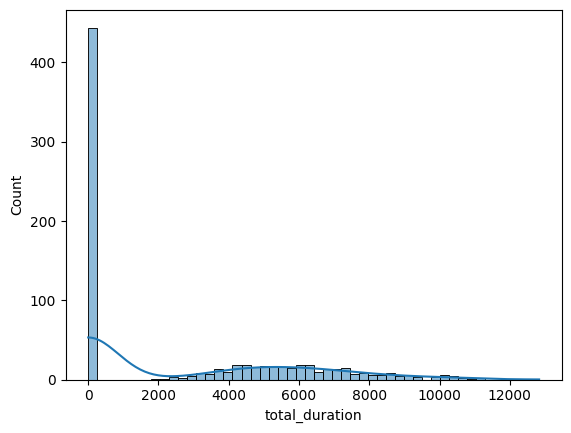

In [9]:
sns.histplot(data=cleaned_df_time['total_duration'], bins=50, kde=True)

In [10]:
cleaned_df_time[cleaned_df_time['total_duration'] == 0]['total_duration'].count()

444

In [11]:
df_filtered = cleaned_df_time[cleaned_df_time['total_duration'] != 0].reset_index(drop=True)
df_filtered

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp,total_duration
0,11673958,1960.0,2457.0,0.0,0.0,0.0,1.696098e+09,4417.0
1,11673963,3403.0,2431.0,0.0,0.0,0.0,1.696092e+09,5834.0
2,11673993,2894.0,2309.0,2084.0,0.0,0.0,1.696160e+09,7287.0
3,11674000,3177.0,0.0,0.0,0.0,0.0,1.696090e+09,3177.0
4,11674008,3419.0,3438.0,3320.0,0.0,0.0,1.696100e+09,10177.0
...,...,...,...,...,...,...,...,...
315,11703444,3615.0,2741.0,0.0,0.0,0.0,1.696255e+09,6356.0
316,11703445,3764.0,2468.0,0.0,0.0,0.0,1.696255e+09,6232.0
317,11703470,3104.0,2662.0,0.0,0.0,0.0,1.696259e+09,5766.0
318,11703524,2118.0,2754.0,0.0,0.0,0.0,1.696256e+09,4872.0


In [12]:
df_filtered['total_duration'].max()

12835.0

c:\Users\arian\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arian\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


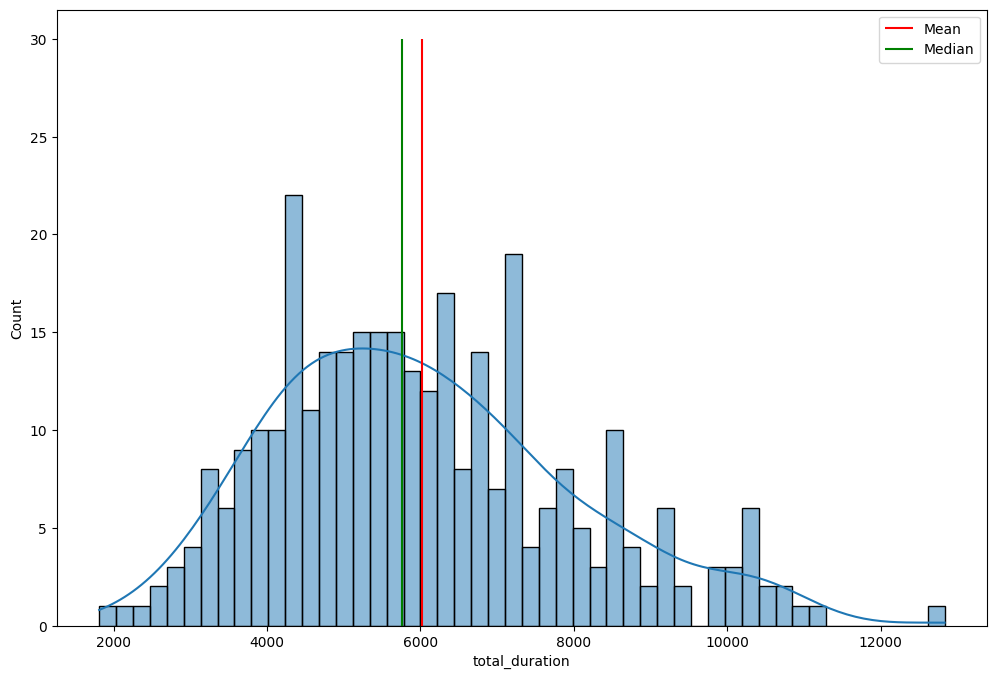

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=df_filtered['total_duration'], bins=50, kde=True, ax=ax)
ax.vlines(x=df_filtered['total_duration'].mean(), ymin=0, ymax=30, color='r', label='Mean')
ax.vlines(x=df_filtered['total_duration'].median(), ymin=0, ymax=30, color='g', label=f"Median")


ax.legend()

c:\Users\arian\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arian\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arian\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


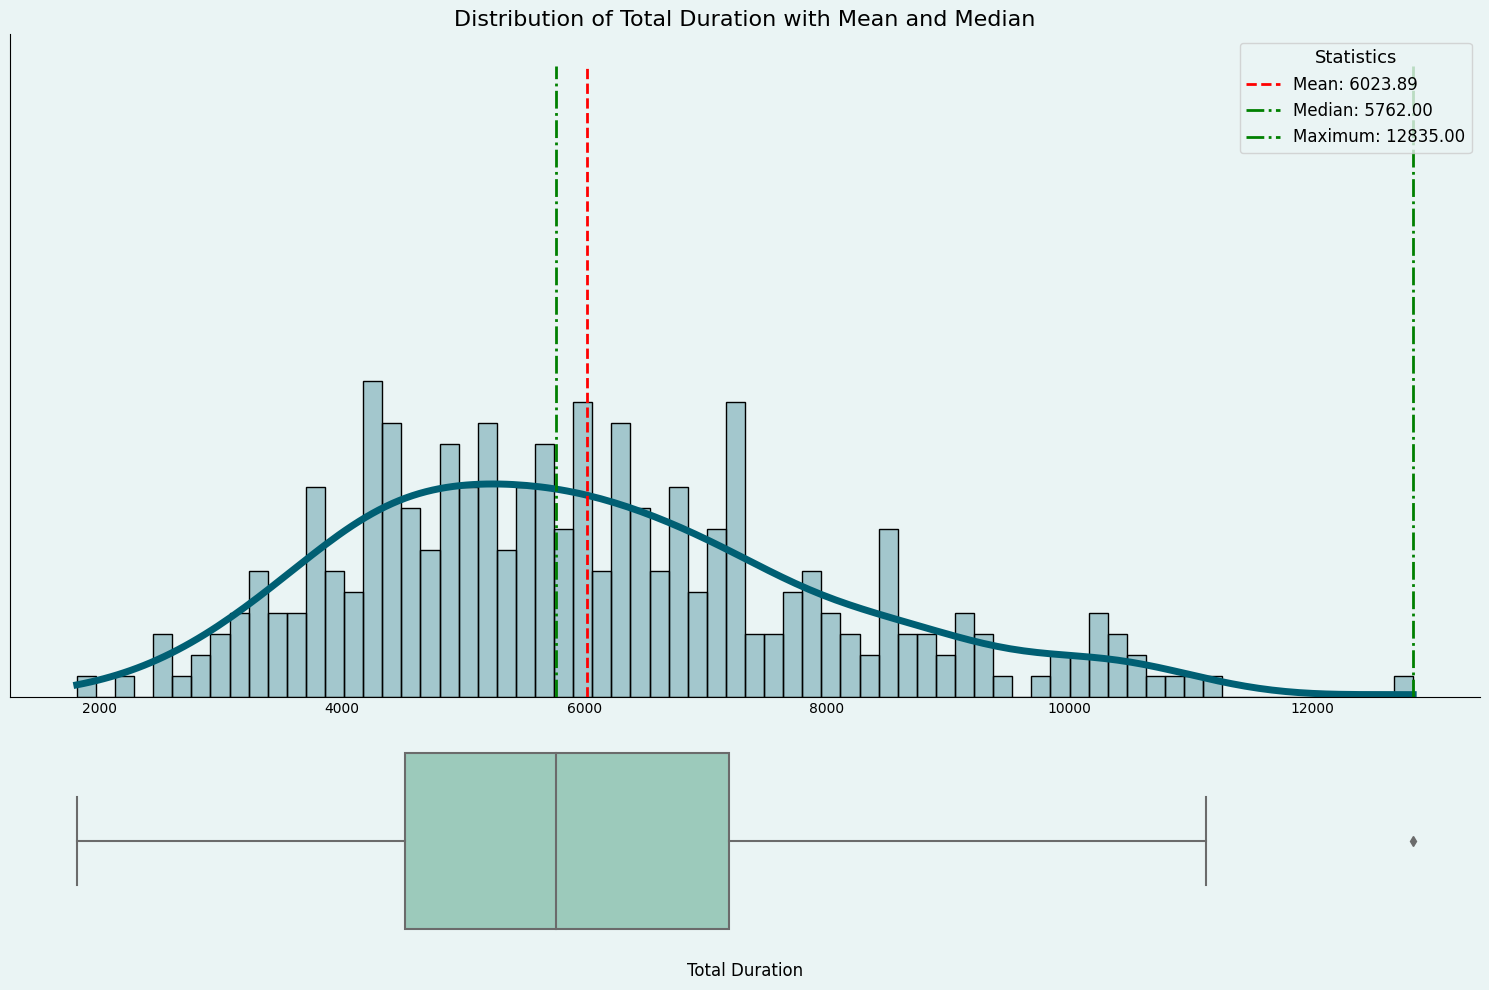

In [42]:
# Corrected plotting code
fig = plt.figure(figsize=(15, 10), facecolor='#EAF4f4') # Returns figure and array of axes

gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

# Axes are now in an array, so you access them using indices
ax1 = fig.add_subplot(gs[0])  # The first subplot
ax2 = fig.add_subplot(gs[1])  # The second subplot

# Plot histogram with KDE on the first axis
sns.histplot(data=df_filtered['total_duration'], bins=70, color='#005f73', alpha=0.3, ax=ax1, kde=True, line_kws={'color': 'red', 'lw': 5}, legend=True)

# Mean and median lines
mean_val = df_filtered['total_duration'].mean()
median_val = df_filtered['total_duration'].median()
max_val = df_filtered['total_duration'].max()
ax1.vlines(x=mean_val, ymin=0, ymax=30, color='red', label=f'Mean: {mean_val:.2f}', linestyles='--', lw=2)
ax1.vlines(x=median_val, ymin=0, ymax=30, color='green', label=f'Median: {median_val:.2f}', linestyles='-.', lw=2)
ax1.vlines(x=max_val, ymin=0, ymax=30, color='green', label=f'Maximum: {max_val:.2f}', linestyles='-.', lw=2)

ax1.set_xlabel('')

ax1.spines[['right',  'top']].set_visible(False)
ax1.set_yticklabels([])

# Enhancements for the first plot
ax1.set_title('Distribution of Total Duration with Mean and Median', fontsize=16)
ax2.set_xlabel('Total Duration', fontsize=14)
ax1.set_ylabel('')

ax1.legend(title='Statistics', title_fontsize='13', fontsize='12', facecolor='#EAF4f4')
ax1.set_facecolor('whitesmoke')
ax1.tick_params(length=0)
ax1.set_facecolor('#EAF4f4')

# Plot boxplot on the second axis
sns.boxplot(x=df_filtered['total_duration'], ax=ax2, color='#94d2bd')

ax2.set_xlabel('Total Duration', fontsize=12)
ax2.spines[['right', 'left', 'top', 'bottom']].set_visible(False)
ax2.tick_params(length=0)
ax2.set_ylabel('')
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_facecolor('#EAF4f4')

plt.tight_layout()  # Adjust the layout
plt.show()


In [15]:
sns.kdeplot(data=df_filtered['total_duration'], color='green', lw=3, linestyle='-', fill=True, alpha=0.3, ax=ax)
plt.show()

c:\Users\arian\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arian\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


c:\Users\arian\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\arian\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arian\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


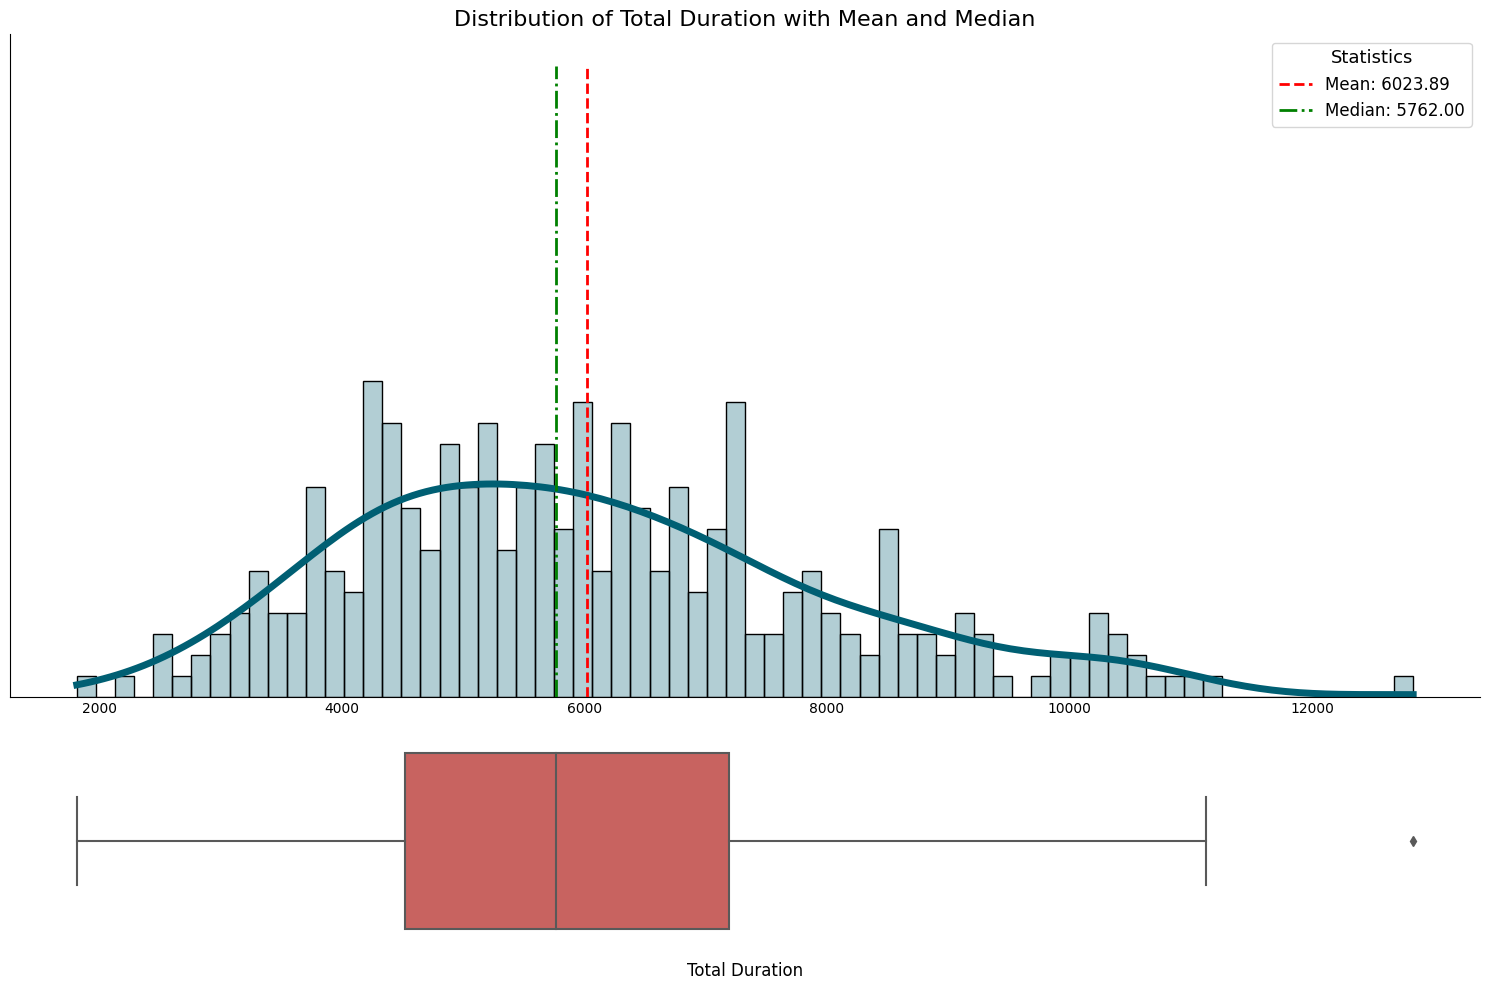

In [16]:
# Corrected plotting code
fig = plt.figure(figsize=(15, 10), facecolor='white') # Returns figure and array of axes

gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

# Axes are now in an array, so you access them using indices
ax1 = fig.add_subplot(gs[0])  # The first subplot
ax2 = fig.add_subplot(gs[1])  # The second subplot

# Plot histogram with KDE on the first axis
sns.histplot(data=df_filtered['total_duration'], bins=70, color='#005f73', alpha=0.3, ax=ax1, kde=True, line_kws={'color': 'red', 'lw': 5}, legend=True)

# Mean and median lines
mean_val = df_filtered['total_duration'].mean()
median_val = df_filtered['total_duration'].median()
ax1.vlines(x=mean_val, ymin=0, ymax=30, color='red', label=f'Mean: {mean_val:.2f}', linestyles='--', lw=2)
ax1.vlines(x=median_val, ymin=0, ymax=30, color='green', label=f'Median: {median_val:.2f}', linestyles='-.', lw=2)
ax1.set_xlabel('')

ax1.spines[['right',  'top']].set_visible(False)
ax1.set_yticklabels([])

# Enhancements for the first plot
ax1.set_title('Distribution of Total Duration with Mean and Median', fontsize=16)
ax2.set_xlabel('Total Duration', fontsize=14)
ax1.set_ylabel('')

ax1.legend(title='Statistics', title_fontsize='13', fontsize='12', facecolor='white')
ax1.set_facecolor('white')
ax1.tick_params(length=0)
ax1.set_facecolor('white')

# Plot boxplot on the second axis
sns.boxplot(x=df_filtered['total_duration'], ax=ax2, color='#d9534f')

ax2.set_xlabel('Total Duration', fontsize=12)
ax2.spines[['right', 'left', 'top', 'bottom']].set_visible(False)
ax2.tick_params(length=0)
ax2.set_ylabel('')
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_facecolor('white')

plt.tight_layout()  # Adjust the layout
plt.show()


In [17]:
df_power_csv = pd.read_csv('tennis_csv/df_power.csv')
df_home_team_csv = pd.read_csv('tennis_csv/df_home_team.csv')

In [18]:
df_power_csv_merged = pd.merge(df_power_csv, df_home_team_csv[['match_id', 'gender']], on='match_id', how='left')
df_power_csv_merged

,match_id,set_num,game_num,value,break_occurred,gender
0,11674074,1,1,30.50,False,F
1,11674074,1,2,81.10,True,F
2,11674074,1,3,51.60,False,F
3,11674074,1,4,-33.80,False,F
4,11674074,1,5,-59.88,True,F
...,...,...,...,...,...,...
3471,11703525,2,8,-10.00,False,M
3472,11703525,2,9,10.00,False,M
3473,11703525,2,10,-10.00,False,M
3474,11703525,2,11,53.80,False,M


In [19]:
filtered_average_set = df_power_csv_merged.groupby(['match_id', 'set_num', 'gender']).agg({'game_num': 'count'}).reset_index()
filtered_average_set

,match_id,set_num,gender,game_num
0,11674074,1,F,12
1,11674074,2,F,7
2,11674103,1,M,10
3,11674103,2,M,8
4,11674105,1,M,13
...,...,...,...,...
313,11703470,2,F,9
314,11703524,1,M,8
315,11703524,2,M,7
316,11703525,1,M,10


In [20]:
male_games = filtered_average_set[filtered_average_set['gender'] == 'M']['game_num'].mean()
female_games = filtered_average_set[filtered_average_set['gender'] == 'F']['game_num'].mean()

male_games, female_games

(9.138461538461538, 8.861702127659575)

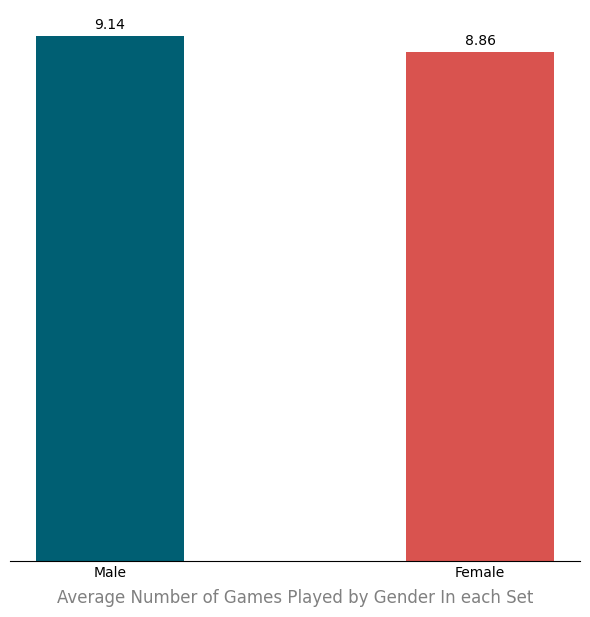

In [43]:
# Assuming male_games and female_games hold the average values you calculated
averages = [male_games, female_games]
categories = ['Male', 'Female']

fig, ax = plt.subplots(figsize=(6, 6))
bars = ax.bar(categories, averages, color=['#005f73', '#d9534f'], width=0.4)

# Adding value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# ax.set_ylabel('Average Number of Games')
# ax.set_title('Average Number of Games Played by Gender In each Set', color='gray')
# ax.set_ylim(0, max(averages) * 1.2)  # Set y-axis limit to make room for labels
ax.set_yticklabels([])
ax.tick_params(length=0)
ax.spines[['right', 'left', 'top']].set_visible(False)
# ax.grid(axis='y', color='lightgray', alpha=0.5, linestyle='--')
fig.text(0.5, -0.02, 'Average Number of Games Played by Gender In each Set', ha='center', va='bottom', color='gray', fontsize=12)

plt.tight_layout()
plt.show()


In [22]:
df_away_team_csv = pd.read_csv('tennis_csv/df_away_team.csv')

In [23]:
plays_df = pd.concat([df_home_team_csv, df_away_team_csv], ignore_index=True)
filtered_plays_df = plays_df.drop_duplicates(subset='name', keep='first')
filtered_plays_df

,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
0,11673958,Barrios Vera T.,barrios-vera-tomas,M,2915,Santiago,"Chillan, Chile",1.91,83.0,right-handed,2014.0,265608.0,646273.0,132834,103.0,BAR,Chile,"Barrios Vera, Tomás"
1,11673962,Tirante T.,tirante-thiago-agustin,M,1519,La Plata,"La Plata, Argentina",1.85,78.0,right-handed,NaN,249335.0,430793.0,221515,123.0,TIR,Argentina,"Tirante, Thiago Agustin"
2,11673963,Heide G.,heide-gustavo,M,1177,NaN,Sao Paulo,1.88,NaN,right-handed,NaN,36929.0,87230.0,302582,247.0,HEI,Brazil,"Heide, Gustavo"
3,11673993,Ajduković D.,ajdukovic-duje,M,1293,"Zagreb, Croatia","Split, Croatia",1.88,75.0,right-handed,NaN,63678.0,198866.0,207081,143.0,AJD,Croatia,"Ajduković, Duje"
4,11674000,Escobedo E.,escobedo-ernesto,M,680,"West Covina, CA, USA","Los Angeles, CA, USA",1.85,82.0,right-handed,2014.0,84375.0,1280430.0,80491,404.0,ESC,Mexico,"Escobedo, Ernesto"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,11701761,Trotter J.,trotter-james-kent,M,328,Japan,Nishinomiya,1.83,75.0,right-handed,NaN,14838.0,32183.0,255993,461.0,TRO,Japan,"Trotter, James Kent"
792,11701779,Wagner S.,wagner-stephanie,F,281,NaN,NaN,NaN,NaN,right-handed,NaN,6861.0,90023.0,74875,560.0,WAG,Germany,"Wagner, Stephanie"
795,11701782,Zaar L.,zaar-lisa,F,242,NaN,NaN,NaN,NaN,NaN,NaN,8179.0,19688.0,152106,740.0,ZAA,Sweden,"Zaar, Lisa"
797,11701785,Lopatetska D.,lopatetska-daria,F,427,NaN,NaN,NaN,NaN,NaN,NaN,5405.0,74063.0,276713,863.0,LOD,Ukraine,"Lopatetska, Daria"


In [24]:
right_handed = filtered_plays_df[filtered_plays_df['plays'] == 'right-handed']['plays'].count()
left_handed = filtered_plays_df[filtered_plays_df['plays'] == 'left-handed']['plays'].count()

right_handed, left_handed

(244, 32)

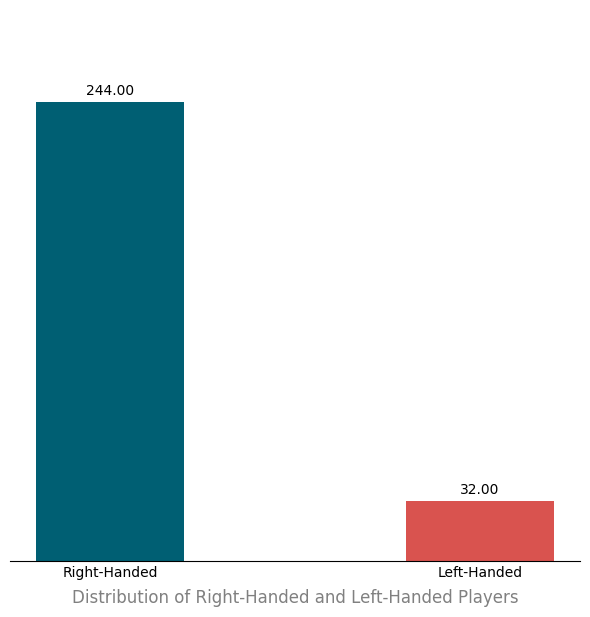

In [44]:
# Assuming male_games and female_games hold the average values you calculated
averages = [right_handed, left_handed]
categories = ['Right-Handed', 'Left-Handed']

fig, ax = plt.subplots(figsize=(6, 6))
bars = ax.bar(categories, averages, color=['#005f73', '#d9534f'], width=0.4)

# Adding value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# ax.set_ylabel('Player Count')
# ax.set_title('Distribution of Right-Handed and Left-Handed Players')
ax.set_ylim(0, max(averages) * 1.2)  # Set y-axis limit to make room for labels
ax.set_yticklabels([])
ax.tick_params(length=0)
ax.spines[['right', 'left', 'top']].set_visible(False)
# ax.grid(axis='y', color='lightgray', alpha=0.5, linestyle='--')
fig.text(0.5, -0.02, 'Distribution of Right-Handed and Left-Handed Players', ha='center', va='bottom', color='gray', fontsize=12)
plt.tight_layout()
plt.show()


In [26]:
df_tournament_csv = pd.read_csv('tennis_csv/df_tournament.csv')

In [27]:
surface_filter = df_tournament_csv.groupby('ground_type')['ground_type'].count()
surface_filter

ground_type
Carpet indoor          3
Hardcourt indoor      84
Hardcourt outdoor    336
Red clay             323
Synthetic outdoor      1
Name: ground_type, dtype: int64

## TODO : COLOR OF THE GROUND TYPES

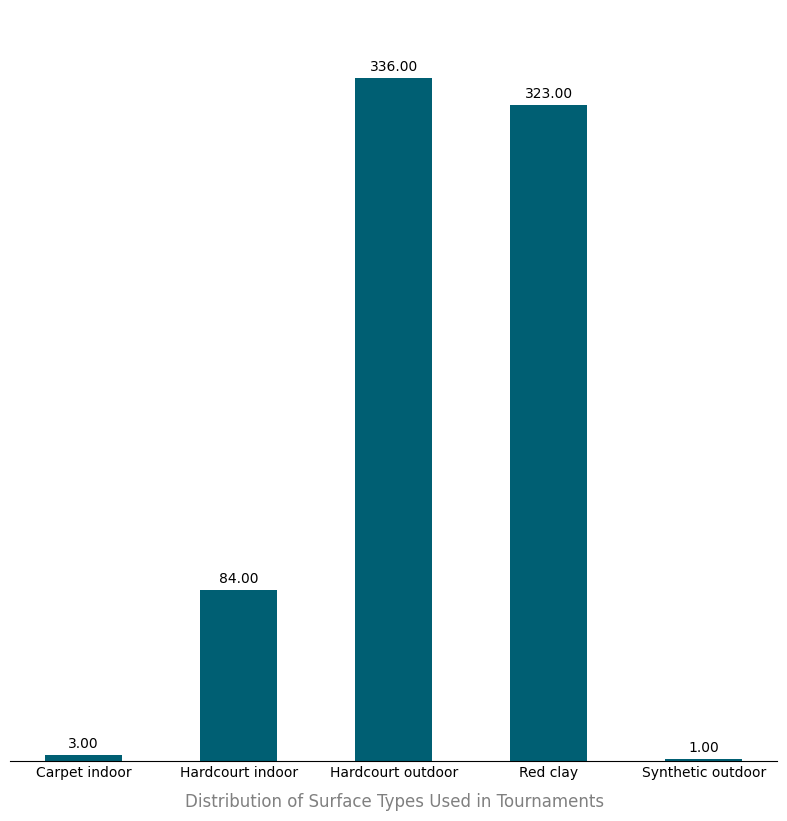

In [51]:
# Assuming male_games and female_games hold the average values you calculated
# averages = [right_handed, left_handed]
# categories = ['Right-Handed', 'Left-Handed']

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(surface_filter.index, surface_filter, color='#005f73', width=0.5)

# Adding value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# ax.set_ylabel('Player Count')
# ax.set_title('Distribution of Right-Handed and Left-Handed Players')
ax.set_ylim(0, max(surface_filter) * 1.1)  # Set y-axis limit to make room for labels
ax.set_yticklabels([])
ax.tick_params(length=0)
ax.spines[['right', 'top', 'left']].set_visible(False)
# ax.grid(axis='y', color='lightgray', alpha=0.5, linestyle='--')
# ax.set_ylim(0, 350)
fig.text(0.5, -0.02, 'Distribution of Surface Types Used in Tournaments', ha='center', va='bottom', color='gray', fontsize=12)
plt.tight_layout()
plt.show()


In [29]:
country_df = pd.concat([df_home_team_csv, df_away_team_csv], ignore_index=True)
filtered_country_df = country_df.drop_duplicates(subset='country', keep='first')['country'].count()
filtered_country_df

70

In [30]:
top10_df = pd.concat([df_home_team_csv, df_away_team_csv], ignore_index=True)
# filtered_top10_df = top10_df.drop_duplicates(subset='match_id', keep='first')
top_10_names = top10_df[top10_df['current_rank'] <= 10]['slug'].tolist()
top_10_games = top10_df[top10_df['current_rank'] <= 10]['match_id'].tolist()

In [31]:
set(top_10_names)

{'alcaraz-carlos',
 'gauff-cori',
 'jabeur-ons',
 'krejcikova-barbora',
 'medvedev-daniil',
 'pegula-jessica',
 'rune-holger',
 'rybakina-elena',
 'sabalenka-aryna',
 'sinner-jannik',
 'swiatek-iga',
 'vondrousova-marketa',
 'zverev-alexander'}

In [32]:
top_10_player_name = []
for player in set(top_10_names):
    top_10_player_name.append(player.split('-')[0])

In [33]:
df_event = pd.read_csv('tennis_csv/df_event.csv')
df_home_team = pd.read_csv('tennis_csv/df_home_team.csv')
df_away_team = pd.read_csv('tennis_csv/df_away_team.csv')

In [34]:
# Merge df_event with df_home_team and df_away_team to get detailed match information including player details and rankings
df_event_home = pd.merge(df_event, df_home_team[['match_id', 'name', 'current_rank']], how='left', on='match_id', suffixes=('', '_home'))
df_event_combined = pd.merge(df_event_home, df_away_team[['match_id', 'name', 'current_rank']], how='left', on='match_id', suffixes=('_home', '_away'))

# Since we need to consider both home and away players, let's create a structure to track wins and total matches against top 10 ranked opponents for each player
# We'll first filter out matches against top 10 ranked opponents, then calculate win percentages for each player

# Filter for matches against top 10 ranked opponents
top_10_matches = df_event_combined[(df_event_combined['current_rank_home'].between(1,10)) | (df_event_combined['current_rank_away'].between(1,10))]

# Initialize a dictionary to hold win and total match counts for each player
player_performance = {}

# Process each match to update performance stats
for index, row in top_10_matches.iterrows():
    # Identify the winning player and the opponent
    winner_side = 'home' if row['winner_code'] == 1 else 'away'
    loser_side = 'away' if winner_side == 'home' else 'home'
    
    winner_name = row[f'name_{winner_side}']
    loser_name = row[f'name_{loser_side}']
    
    # Update stats for the winner
    if winner_name not in player_performance:
        player_performance[winner_name] = {'wins': 0, 'total': 0}
    player_performance[winner_name]['wins'] += 1
    player_performance[winner_name]['total'] += 1
    
    # Update stats for the loser
    if loser_name not in player_performance:
        player_performance[loser_name] = {'wins': 0, 'total': 0}
    player_performance[loser_name]['total'] += 1

# Calculate winning percentage for each player and identify the player with the highest winning percentage
highest_percentage = 0
best_player = None
for player, stats in player_performance.items():
    win_percentage = stats['wins'] / stats['total'] * 100
    if win_percentage > highest_percentage:
        highest_percentage = win_percentage
        best_player = player

(best_player, highest_percentage)


('Kudermetova V.', 100.0)

In [53]:
player_performance

{'Kudermetova V.': {'wins': 1, 'total': 1},
 'Pegula J.': {'wins': 0, 'total': 1},
 'Medvedev D.': {'wins': 1, 'total': 1},
 'Humbert U.': {'wins': 0, 'total': 1},
 'Zverev A.': {'wins': 2, 'total': 2},
 'Jarry N.': {'wins': 0, 'total': 1},
 'Alcaraz C.': {'wins': 2, 'total': 2},
 'Musetti L.': {'wins': 0, 'total': 1},
 'Sinner J.': {'wins': 2, 'total': 2},
 'Dimitrov G.': {'wins': 1, 'total': 2},
 'Rune H.': {'wins': 0, 'total': 1},
 'Ruud C.': {'wins': 0, 'total': 1},
 'Davidovich Fokina A.': {'wins': 0, 'total': 1},
 'Nishioka Y.': {'wins': 0, 'total': 1},
 'Sabalenka A.': {'wins': 1, 'total': 1},
 'Kenin S.': {'wins': 0, 'total': 1},
 'Rybakina E.': {'wins': 1, 'total': 1},
 'Zheng Q.': {'wins': 0, 'total': 1},
 'Gauff C.': {'wins': 1, 'total': 1},
 'Alexandrova E.': {'wins': 0, 'total': 1},
 'Kalinina A.': {'wins': 1, 'total': 1},
 'Vondroušová M.': {'wins': 0, 'total': 1},
 'Świątek I.': {'wins': 1, 'total': 1},
 'Sorribes Tormo S.': {'wins': 0, 'total': 1},
 'Andreeva M.': {'win

In [52]:
df_event_combined[(df_event_combined['name_home'] == 'Kudermetova V.') | (df_event_combined['name_away'] == 'Kudermetova V.')]

,match_id,first_to_serve,home_team_seed,away_team_seed,custom_id,winner_code,default_period_count,start_datetime,match_slug,final_result_only,name_home,name_away
10,11674074,1.0,8,2,JWrstOB,1.0,3,1696129200,kudermetova-pegula,False,Kudermetova V.,Pegula J.


In [35]:
top_10_matches

,match_id,first_to_serve,home_team_seed,away_team_seed,custom_id,winner_code,default_period_count,start_datetime,match_slug,final_result_only,name_home,current_rank_home,name_away,current_rank_away
10,11674074,1.0,8,2,JWrstOB,1.0,3,1696129200,kudermetova-pegula,False,Kudermetova V.,19.0,Pegula J.,5.0
18,11675440,2.0,NaN,2,evpbsNhzb,2.0,3,1696221000,humbert-medvedev,False,Humbert U.,20.0,Medvedev D.,3.0
19,11675443,1.0,8,NaN,nTxsHRK,1.0,3,1696230000,jarry-zverev,False,Zverev A.,7.0,Jarry N.,19.0
20,11675444,1.0,1,NaN,pvecsytkc,1.0,3,1696147200,alcaraz-musetti,False,Alcaraz C.,2.0,Musetti L.,27.0
21,11675445,1.0,NaN,6,GwjsvGHb,2.0,3,1696251600,sinner-dimitrov,False,Dimitrov G.,14.0,Sinner J.,4.0
22,11675446,1.0,3,NaN,Gwjsvlnc,2.0,3,1696159800,rune-dimitrov,False,Rune H.,8.0,Dimitrov G.,14.0
23,11675447,1.0,1,7,YJXsytkc,1.0,3,1696245900,alcaraz-ruud,False,Alcaraz C.,2.0,Ruud C.,11.0
25,11675449,2.0,8,NaN,nTxsgZmb,1.0,3,1696089300,davidovich-fokina-zverev,False,Zverev A.,7.0,Davidovich Fokina A.,26.0
26,11675450,2.0,NaN,6,GKysvGHb,2.0,3,1696152900,sinner-nishioka,False,Nishioka Y.,47.0,Sinner J.,4.0
35,11697107,1.0,1,WC,kOLsefnb,1.0,3,1696142100,sabalenka-kenin,False,Sabalenka A.,2.0,Kenin S.,33.0


In [36]:
player_wins_from_top = {}

# Iterate over the fully merged DataFrame to count wins for each player
for index, row in df_event_combined.iterrows():
    winner_side = 'home' if row['winner_code'] == 1 else 'away'
    winner_name = row[f'name_{winner_side}']
    
    # Skip if winner name is NaN
    if pd.isna(winner_name):
        continue
    
    # Update win count for the winner
    if winner_name not in player_wins_from_top:
        player_wins_from_top[winner_name] = 1
    else:
        player_wins_from_top[winner_name] += 1

# Now, find the player with the highest number of wins
max_wins_from_top = max(player_wins_from_top.values())
best_players_with_most_wins_from_top = [player for player, wins in player_wins_from_top.items() if wins == max_wins_from_top]

(best_players_with_most_wins_from_top, max_wins_from_top)

(['Milushev P.', 'Panaras A.', 'Kalina V.', 'Derdoy F.'], 3)

In [41]:
df_event_combined[(df_event_combined['name_home'] == 'Derdoy F.') | (df_event_combined['name_away'] == 'Derdoy F.')]

,match_id,first_to_serve,home_team_seed,away_team_seed,custom_id,winner_code,default_period_count,start_datetime,match_slug,final_result_only,name_home,name_away
404,11699423,NaN,WC,NaN,FvibsCNRd,NaN,3,1696172400,messa-derdoy,True,NaN,Derdoy F.
638,11701667,NaN,A,NaN,FvibsnWed,2.0,3,1696172400,bianchi-derdoy,False,NaN,Derdoy F.
747,11702238,NaN,NaN,NaN,FvibsMqoc,2.0,3,1696251600,karakachian-derdoy,False,NaN,Derdoy F.


In [40]:
df_event_combined.head()

,match_id,first_to_serve,home_team_seed,away_team_seed,custom_id,winner_code,default_period_count,start_datetime,match_slug,final_result_only,name_home,name_away
0,11673958,NaN,1,4,JgdbspFNb,2.0,3,1696094700,tirante-barrios-vera,False,Barrios Vera T.,Tirante T.
1,11673962,NaN,4,NaN,pFNbsHbwc,1.0,3,1696176000,heide-tirante,False,Tirante T.,Heide G.
2,11673963,NaN,NaN,NaN,fTxsHbwc,1.0,3,1696087800,heide-jorda-sanchis,False,Heide G.,Jorda Sanchis D.
3,11673993,NaN,NaN,Q,axvsGQHb,2.0,3,1696154400,ajdukovic-roca-batalla,False,Ajduković D.,Roca Batalla O.
4,11674000,NaN,Q,WC,QjHshlKb,2.0,3,1696086000,crawford-escobedo,False,Escobedo E.,Crawford O.
